<a href="https://colab.research.google.com/github/Farzana34/iFeature/blob/master/Depressive_text_with_emoji_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
                                 # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer 



import seaborn as sns
sns.set_style("whitegrid")



# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# Text Classifiation using NLP

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dp_12.csv to dp_12.csv


In [ ]:
import io
import pandas as pd


reviews = pd.read_csv(io.BytesIO(uploaded['dp_12.csv']),encoding="UTF-8",header=None)
reviews.head()

,0,1
0,পরিবার কি জিনিস প্রত্যেকটা মুহূর্ত বুঝতেসি.......,depressed
1,"দেয়ালের ওপারে আছে আকাশ,খেয়ালের নানা রং আছে বাত...",depressed
2,এই আওয়াজটা আর মনে হয় না কোনোদিনও শুনতে পাবো 😔,depressed
3,"কনফিউশন হতেই পারে জীবনে অনেক সিচুয়েশন নিয়ে, কি...",not depressed
4,উনাদেরকে নিয়ে লিখা দরকার ভাবছি অনেকদিন থেকে।কি...,not depressed


In [ ]:
# Importing the dataset
#reviews = pd.read_csv('/content/drive/My Drive/dp.csv',encoding="UTF-8",header=None)
yy= reviews[1]
X=reviews[0]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42,shuffle=True)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stopwords.txt to stopwords.txt


In [ ]:
pip install py-bangla-stemmer

  Created wheel for py-bangla-stemmer: filename=py_bangla_stemmer-0.5.1-cp36-none-any.whl size=17336 sha256=2d1e30f78bdae194a2189a6058347f5733846a7192cafd9057e74698c38815bd
  Stored in directory: /root/.cache/pip/wheels/20/8e/75/395e25df10dbcfbff50808fffb5ea1ca576ab1c5b13251e2a8
Successfully built py-bangla-stemmer


In [ ]:
pip install git+https://github.com/banglakit/bengali-stemmer.git

  Cloning https://github.com/banglakit/bengali-stemmer.git to /tmp/pip-req-build-95x8_lrl
  Running command git clone -q https://github.com/banglakit/bengali-stemmer.git /tmp/pip-req-build-95x8_lrl
  Created wheel for bengali-stemmer: filename=bengali_stemmer-0.0.1-py2.py3-none-any.whl size=6393 sha256=acdb55543f4140dbbf96c5a356e83ea25fab70866711d30b5b2ac0058eb5bc3b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ot4k9e5q/wheels/a1/ad/a1/4ba354059b17c00600a14e13a504e7bdb49f20f2f4e2f3639c
Successfully built bengali-stemmer


In [ ]:
nltk.download('punkt')
from py_bangla_stemmer import BanglaStemmer

#stemmer = BanglaStemmer() 
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
#stemmer.stem_word('বাংলায়')
#stemmer.stem('জনপ্রিয়তা')
with open('stopwords.txt', 'r', encoding='utf-8') as bn:
        bangla_stop_words = [line.strip() for line in bn]

from nltk.tokenize import word_tokenize 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;!“ ”?#+-_*"%]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
   # """
    #    text: a string
        
    #    return: modified initial string
    #"""
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
  
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text= re.sub("\d+\.?\d*"," ", text)     #remove decimal number
    text = re.sub('[a-zA-Z]', ' ', text)     #remove english word\n",
    text = re.sub('[।]', ' ', text) #remove \n",
    text = re.sub('[.]', ' ', text) #remove .",
    text = text.replace("'", "") #remove '
    #text = re.sub('[\'\]', ' ', text)
    text=' '.join([stemmer.stem_word(word) for word in text.split() if word not in bangla_stop_words]) 
    #text = ' '.join([word for word in text.split() if word not in bangla_stop_words])  # remove stop words\n",
    #print(text)
    return text

XX=[]
for news in X:
   news=clean_text(news)
   
   print(news)
   XX.append(news)


Streaming output truncated to the last 5000 lines.
অনুরোধ রইল এগি সাহায্য করুন
শিক্ষক বাব সমতুল্য
জীবন টাইমলাইন দিনক্ষণ খুব অর্থবহ তাৎপর্যপূর্ণ
চেস্ দেখুন
ভালোবাস মানুষ
একটু ব্যস্ত আ আজ ইনবক্স মেসেজ একটু ধৈর্য্য ধরব প্লিজ
আজ আব্বু বেচ থাকল বল চিন্তা করো কেনো আল্লাহ ভরসা বাবা আছিনা
বাগান
বর্তমান এফ কমার্স জনপ্রি বিজনেস সাইট
ফেসবুক মেসেন্জ সকল নেট দুনিয়া স্টিক এসব স্টিকার অর্থ বুঝ কর ইচ্ছেমত
আল্লাহপাক সঠিক বুঝ দান করুক
আশাকরি শীগ্র আপনা ন্যায্য অধিক হিসেব শিক্ষার্থী বান্ধব ওয়েভার নোটিশ পাবো ইনশা আল্লাহ
বাংলাদেশ চলত শিক্ষা ব্যবসা
ঈ দুনিয়া বিদা
ষোল আনা বাঙ্গালীয়ানা
মা ক্যান্স আক্রান্ত
রিমঝিম বৃষ্ ঝর অঝোর ধারা
অপেক্ষা করিয়ে
জীবন চরম সত‍্য কথা
সরকারি বেসরকারি বিশ্ববিদ্যালয় পার্থক্য
চুয়েট শিক্ষার্থী তৈরি কোরবানির পশুর মড বাজ নকশা আজক দৈনিক আজাদীর প্রতিবেদন
আল্লাহ সুবহানাহু ওয়াতাআল অশেষ রহমত বাব কৃতিত্ব
স্কুল লাইফ মান
কথা সত্যি
ভালবাস রং কেমন ধূসর
সাবরিনা বিচ অথোরি বিচ
সবসম ইচ্ছা ছোট বেলা
দেশ সকল শিক্ষা ব্যবস্থা ব্যবসা রুপধারন
মৃত্যুর আগ স্বচক্ষ অবজারভেশন
এক একদম মন বানানোর এত্ খুশি লাগ বল
প্র

In [ ]:
print(XX)

['পরিব জিন প্রত্যেক মুহূর্ত বুঝতেসি একা এক বাসা অফ আসা রান্না কাপড় ধোয়া 😔', 'দেয়াল ওপার আকাশ খেয়াল রং বাতাস আকাশ বাতাস ছোঁ কেদ যা কেদ যা কেদ যা কেমন বল খান যা তোম আছ সবা 😔', 'আওয়াজ কোনোদিন শুন পাবো 😔', 'কনফিউশন জীবন সিচুয়েশন হ্যাট্রিক বিস্কিট ক্রিমি অরেঞ্জ মিল্ক কম্বিনেশন স্বাদ একদম কনফিউশন', 'উনা লিখা দরক ভাব অনেকদিন আজব লিখা আসছেনা', 'বল তো এখনো বি কর নি', 'পরিমাণ ফাকড আপ ওয়েদ হইল রাত ট সম ডিগ্রি সেলসিয়াস তাপমাত্ 😔', 'অসময় এক ঘুম হুট ঘুম ভেঙ কেমন এক উথাল পাথাল মন খারাপ ☹️', 'বুক ভেতর\u200d কেমন খা খা সত্যিকার পৃথিবী চল পৃথিবী কেমন স্তব্ধ ☹️', 'পৃথিবী সবচা কঠিন বোধহ বুঝানো অকারণ ভয়াবহ রকম মন খারাপ ☹️', 'দেখো কেমন এক ভয়ংকর যুদ্ধ চল এখান দেখো যুদ্ধ আওয়াজ শুন পা কখনো শুন পা 😞', 'প্রতিব পাবলিক প্রাইভেট ভার্সি মারামারি লাগল সবচা দোটানা পড়ি 😞', 'রাত গা অদৃশ্য কা স্রষ্ লিখ বিষণ্ণতা ভ এক রাত 😞', 'হুট পৃথিবী কেমন শূন্য শূন্য লাগ কেমন এক হাহাক চারপাশ বাতাস কেমন এক বিষণ্ণতা ভেস বেড়া 😞', 'অকারণ বুক চেপ বসা কোথা অনুভূতিট ব্যাখ্যাতীত অসহা অনুভূতি পৃথিবী', 'একদিন বলসিলো ক্রাশ সাথ কথা বল এক উপা স্টোর

In [ ]:
yy=pd.get_dummies(yy)
print(yy)

      depressed  not depressed
0             1              0
1             1              0
2             1              0
3             0              1
4             0              1
...         ...            ...
6173          1              0
6174          1              0
6175          0              1
6176          1              0
6177          0              1

[6178 rows x 2 columns]


In [ ]:
#print(yy.index[' not depressed'])
y=yy.iloc[:,1].values

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3),token_pattern=r'[^\s]+')
X=tfidf_v.fit_transform(XX).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef
nb1= MultinomialNB(alpha=0.0).fit(X_train, y_train)

y_pred=nb1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
nb_ac=accuracy_score(y_pred, y_test)*100
print(nb1.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


Accuracy: 
83.33333333333334
0.8333333333333334
[[517 120]
 [ 86 513]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       637
           1       0.81      0.86      0.83       599

    accuracy                           0.83      1236
   macro avg       0.83      0.83      0.83      1236
weighted avg       0.83      0.83      0.83      1236

10 fold cross validation
86.80637073636397
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3078
           1       0.88      0.86      0.87      3100

    accuracy                           0.87      6178
   macro avg       0.87      0.87      0.87      6178
weighted avg       0.87      0.87      0.87      6178

MCC=
0.7363508076614677


In [ ]:
tfidf_v.get_feature_names()[:20]

['ঃ',
 'অংক',
 'অংশ',
 'অকারণ',
 'অকৃতকার্য',
 'অক্সিজ',
 'অক্সিজ সিলিন্ড',
 'অচেনা',
 'অজানা',
 'অজান্',
 'অজুহাত',
 'অটো',
 'অতি',
 'অতিরিক্ত',
 'অতীত',
 'অত্যন্ত',
 'অত্যাচ',
 'অত্যান্ত',
 'অত্যান্ত কষ্ট',
 'অত্র']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [ ]:

count_df.head()

,ঃ,অংক,অংশ,অকারণ,অকৃতকার্য,অক্সিজ,অক্সিজ সিলিন্ড,অচেনা,অজানা,অজান্,অজুহাত,অটো,অতি,অতিরিক্ত,অতীত,অত্যন্ত,অত্যাচ,অত্যান্ত,অত্যান্ত কষ্ট,অত্র,অত্র প্রতিষ্ঠান,অদ্ভুত,অদ্ভূত,অধিক,অধিক সকল,অধিকাংশ,অধ্যা,অধ্যা চলা,অধ্যা চলা অত্যান্ত,অন,অনন্য,অনন্য দৃষ্টান্ত,অনন্য দৃষ্টান্ত রাখলো,অনবরত,অনলাইন,অনলাইন ক্লাশ,অনলাইন ক্লাস,অনলাইন প্রেস,অনলাইন প্রেস ক্লাব,অনিক,...,হাসপাতাল মানবত হাসপাতাল,হাসলাম,হাসি,হাসি একদিন,হাসি একদিন অপচ,হাসিখুশি,হাসিমুখ,হাহাক,হায়র,হিংসা,হিন্দি,হিরো,হিসেব,হুট,হুটহাট,হৃদ,হৃদয়,হেঁট,হেদায়েত,হের,হের গে,হেলাফেলা,হোন,হোম,হোমপেজ,হ্যাঁ,হ্যাঁ রাগ,হ্যাপি,হ্যালো,হ্যালো এম্বুল্যান্স,হয়ত,হয়তোবা,হয়না,হয়ে,হয়েছিলাম,হয়েছিলো,–,☹️,😔,😞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.373833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(random_state=0)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print(linear_clf.score(X_test, y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("10 fold cross validation")
linear_clf2 = cross_val_score(linear_clf, X, y, cv=10)
print(linear_clf2.mean()*100)
predictions = cross_val_predict(linear_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

accuracy:   0.910
0.9101941747572816
[[563  74]
 [ 37 562]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       637
           1       0.88      0.94      0.91       599

    accuracy                           0.91      1236
   macro avg       0.91      0.91      0.91      1236
weighted avg       0.91      0.91      0.91      1236

10 fold cross validation
96.42019795125177
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3078
           1       0.99      0.94      0.96      3100

    accuracy                           0.96      6178
   macro avg       0.97      0.96      0.96      6178
weighted avg       0.97      0.96      0.96      6178

MCC=
0.9293537363120845


In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))
    nb2 = cross_val_score(sub_classifier, X, y, cv=10)
    print(nb2.mean()*100)

Alpha: 0.0, Score : 0.8333333333333334
86.80637073636397
Alpha: 0.1, Score : 0.8317152103559871
85.4308613029955
Alpha: 0.2, Score : 0.8292880258899676
84.88075194200982
Alpha: 0.30000000000000004, Score : 0.8268608414239482
84.63800726975185
Alpha: 0.4, Score : 0.8220064724919094
84.44370138419013
Alpha: 0.5, Score : 0.8236245954692557
84.10384310763533
Alpha: 0.6000000000000001, Score : 0.8244336569579288
83.73164859718966
Alpha: 0.7000000000000001, Score : 0.8211974110032363
83.50511138036116
Alpha: 0.8, Score : 0.8203883495145631
83.31088417176755
Alpha: 0.9, Score : 0.8211974110032363
83.2622880311351


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=0)

clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print (" Decission tree accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(clf_tree, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_tree, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

 Decission tree accuracy:  92.39482200647248
[[595  42]
 [ 52 547]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       637
           1       0.93      0.91      0.92       599

    accuracy                           0.92      1236
   macro avg       0.92      0.92      0.92      1236
weighted avg       0.92      0.92      0.92      1236

10 fold cross validation
96.59766696563915
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3078
           1       0.99      0.94      0.97      3100

    accuracy                           0.97      6178
   macro avg       0.97      0.97      0.97      6178
weighted avg       0.97      0.97      0.97      6178

MCC=
0.9335112157561283


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=200, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print ("random Forest accuracy: ",acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(clf_rf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(clf_rf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

random Forest accuracy:  84.62783171521036
[[471 166]
 [ 24 575]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       637
           1       0.78      0.96      0.86       599

    accuracy                           0.85      1236
   macro avg       0.86      0.85      0.85      1236
weighted avg       0.87      0.85      0.84      1236

10 fold cross validation
89.2983325727893
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      3078
           1       0.84      0.97      0.90      3100

    accuracy                           0.89      6178
   macro avg       0.90      0.89      0.89      6178
weighted avg       0.90      0.89      0.89      6178

MCC=
0.794966204658571


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print("10 fold cross validation")
scores = cross_val_score(mlp, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(mlp, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

[[581  56]
 [ 49 550]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       637
           1       0.91      0.92      0.91       599

    accuracy                           0.92      1236
   macro avg       0.91      0.92      0.91      1236
weighted avg       0.92      0.92      0.92      1236

0.9150485436893204
10 fold cross validation
97.11654157028737
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3078
           1       0.99      0.95      0.97      3100

    accuracy                           0.97      6178
   macro avg       0.97      0.97      0.97      6178
weighted avg       0.97      0.97      0.97      6178

MCC=
0.941440145273111


In [ ]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression(random_state=0)
classifer.fit(X_train,y_train)
yy_pred= classifer.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print("10 fold cross validation")
scores = cross_val_score(classifer, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(classifer, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

[[471 166]
 [ 24 575]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       637
           1       0.78      0.96      0.86       599

    accuracy                           0.85      1236
   macro avg       0.86      0.85      0.85      1236
weighted avg       0.87      0.85      0.84      1236

0.8462783171521036
10 fold cross validation
81.99983740093259
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      3078
           1       0.82      0.81      0.82      3100

    accuracy                           0.82      6178
   macro avg       0.82      0.82      0.82      6178
weighted avg       0.82      0.82      0.82      6178

MCC=
0.6400786468653629


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = KNeighborsClassifier()

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.62      0.84      0.72       637
           1       0.73      0.46      0.56       599

    accuracy                           0.65      1236
   macro avg       0.68      0.65      0.64      1236
weighted avg       0.67      0.65      0.64      1236

10 fold cross validation
73.859315090767
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3078
           1       0.77      0.69      0.73      3100

    accuracy                           0.74      6178
   macro avg       0.74      0.74      0.74      6178
weighted avg       0.74      0.74      0.74      6178

MCC=
0.48006292561330594


In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = BaggingClassifier(KNeighborsClassifier())

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       637
           1       0.85      0.58      0.69       599

    accuracy                           0.75      1236
   macro avg       0.78      0.74      0.74      1236
weighted avg       0.77      0.75      0.74      1236

10 fold cross validation


KeyboardInterrupt: ignored

In [ ]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = GradientBoostingClassifier(n_estimators=550,verbose=2)
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(classification_report(y_test, predicted))


      Iter       Train Loss   Remaining Time 
         1           1.3788           11.38m
         2           1.3725           11.28m
         3           1.3665           11.29m
         4           1.3614           11.29m
         5           1.3572           11.29m
         6           1.3524           11.21m
         7           1.3478           11.18m
         8           1.3437           11.16m
         9           1.3405           11.15m
        10           1.3368           11.14m
        11           1.3335           11.13m
        12           1.3301           11.08m
        13           1.3277           11.08m
        14           1.3252           11.08m
        15           1.3230           11.07m
        16           1.3199           11.04m
        17           1.3174           11.02m
        18           1.3152           11.01m
        19           1.3128           10.99m
        20           1.3101           10.97m
        21           1.3078           10.95m
        2

In [ ]:

scores = cross_val_score(text_clf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

      Iter       Train Loss   Remaining Time 
         1           1.3786            9.68m
         2           1.3723            9.63m
         3           1.3670            9.69m
         4           1.3623            9.67m
         5           1.3579            9.66m
         6           1.3530            9.65m
         7           1.3491            9.63m
         8           1.3459            9.62m
         9           1.3424            9.64m
        10           1.3381            9.58m
        11           1.3346            9.57m
        12           1.3317            9.55m
        13           1.3292            9.54m
        14           1.3259            9.52m
        15           1.3239            9.62m
        16           1.3216            9.60m
        17           1.3190            9.58m
        18           1.3163            9.56m
        19           1.3145            9.55m
        20           1.3124            9.54m
        21           1.3100            9.53m
        2

KeyboardInterrupt: ignored

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = NearestCentroid()

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


              precision    recall  f1-score   support

           0       0.77      0.68      0.72       637
           1       0.70      0.78      0.74       599

    accuracy                           0.73      1236
   macro avg       0.74      0.73      0.73      1236
weighted avg       0.74      0.73      0.73      1236

10 fold cross validation
73.76117868588481
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      3078
           1       0.72      0.78      0.75      3100

    accuracy                           0.74      6178
   macro avg       0.74      0.74      0.74      6178
weighted avg       0.74      0.74      0.74      6178

MCC=
0.4768012902909343


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import fetch_20newsgroups
text_clf = LinearSVC()

text_clf.fit(X_train, y_train)


predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print("10 fold cross validation")
scores = cross_val_score(text_clf, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(text_clf, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       637
           1       0.89      0.89      0.89       599

    accuracy                           0.90      1236
   macro avg       0.90      0.90      0.90      1236
weighted avg       0.90      0.90      0.90      1236

10 fold cross validation
91.82362721803486
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3078
           1       0.93      0.90      0.92      3100

    accuracy                           0.92      6178
   macro avg       0.92      0.92      0.92      6178
weighted avg       0.92      0.92      0.92      6178

MCC=
0.8370369671432581


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=0, max_iter=50, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_test, y_pred))
print("10 fold cross validation")
scores = cross_val_score(sgd, X, y, cv=10)
print(scores.mean()*100)
predictions = cross_val_predict(sgd, X, y, cv=10)
print(classification_report(y,predictions))
print('MCC=')
print(matthews_corrcoef(y, predictions))


Accuracy: 
76.69902912621359
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       637
           1       0.73      0.82      0.77       599

    accuracy                           0.77      1236
   macro avg       0.77      0.77      0.77      1236
weighted avg       0.77      0.77      0.77      1236

10 fold cross validation
76.49661951293712
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      3078
           1       0.75      0.80      0.77      3100

    accuracy                           0.76      6178
   macro avg       0.77      0.76      0.76      6178
weighted avg       0.77      0.76      0.76      6178

MCC=
0.5310321165528848


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,GRU, Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
voc_size=10000

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in XX] 
onehot_repr

[[8565,
  9779,
  2771,
  712,
  2003,
  3870,
  4078,
  3583,
  7385,
  1207,
  5378,
  2857,
  4883,
  8739],
 [2710,
  7567,
  8271,
  2,
  9694,
  4016,
  8271,
  4016,
  7063,
  4007,
  9874,
  4007,
  9874,
  4007,
  9874,
  4712,
  1509,
  6904,
  9874,
  2860,
  8554,
  4519,
  8739],
 [4776, 8059, 538, 8857, 8739],
 [7718, 7136, 2128, 3599, 1858, 8585, 1239, 3325, 2496, 6684, 3143, 7718],
 [6018, 7503, 7029, 8423, 7823, 8459, 7503, 7157],
 [1509, 9916, 8295, 9994, 7750, 1118],
 [2431, 5723, 5042, 8532, 1535, 2824, 8941, 4829, 4782, 2306, 5657, 8739],
 [2878, 4078, 3551, 1851, 3551, 8349, 4712, 4078, 7215, 6545, 9268, 7742, 225],
 [8119, 3406, 4712, 2525, 2525, 8120, 7389, 9273, 7389, 4712, 6811, 225],
 [7389, 3485, 6352, 4974, 3029, 8583, 8008, 324, 9268, 7742, 225],
 [3040,
  4712,
  4078,
  8764,
  127,
  9273,
  705,
  3040,
  127,
  4776,
  538,
  2919,
  1025,
  538,
  2919,
  3643],
 [8245, 2879, 3612, 6764, 3035, 4411, 3485, 5163, 9656, 3643],
 [2824, 4788, 1729, 7689, 

In [ ]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2857 4883 8739]
 [   0    0    0 ... 8554 4519 8739]
 [   0    0    0 ...  538 8857 8739]
 ...
 [   0    0    0 ... 9028 8569 2674]
 [   0    0    0 ... 3006 6404 7742]
 [   0    0    0 ... 2026 4078 6112]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 8565, 9779, 2771,  712, 2003, 3870, 4078,
       3583, 7385, 1207, 5378, 2857, 4883, 8739], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 40)            400000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 40)            400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=0)

In [ ]:
#bidirectional lstm
history=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64)

Epoch 1/60
78/78 [==============================] - 7s 95ms/step - loss: 0.6835 - accuracy: 0.5773 - val_loss: 0.6335 - val_accuracy: 0.6618
Epoch 2/60
78/78 [==============================] - 6s 83ms/step - loss: 0.4582 - accuracy: 0.8096 - val_loss: 0.4255 - val_accuracy: 0.8066
Epoch 3/60
78/78 [==============================] - 7s 84ms/step - loss: 0.2567 - accuracy: 0.9027 - val_loss: 0.3374 - val_accuracy: 0.8584
Epoch 4/60
78/78 [==============================] - 6s 83ms/step - loss: 0.1520 - accuracy: 0.9435 - val_loss: 0.2790 - val_accuracy: 0.8956
Epoch 5/60
78/78 [==============================] - 6s 83ms/step - loss: 0.0938 - accuracy: 0.9668 - val_loss: 0.2603 - val_accuracy: 0.9110
Epoch 6/60
78/78 [==============================] - 6s 83ms/step - loss: 0.0637 - accuracy: 0.9781 - val_loss: 0.2874 - val_accuracy: 0.9207
Epoch 7/60
78/78 [==============================] - 6s 82ms/step - loss: 0.0469 - accuracy: 0.9832 - val_loss: 0.2902 - val_accuracy: 0.9264
Epoch 8/60
78

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.936084142394822
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       637
           1       0.92      0.95      0.94       599

    accuracy                           0.94      1236
   macro avg       0.94      0.94      0.94      1236
weighted avg       0.94      0.94      0.94      1236

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


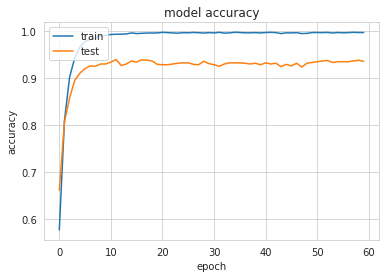

MCC=
0.8727981390708287


In [ ]:
#Bidrectional LSTM
from keras.callbacks import History 
import matplotlib.pyplot as plt
y_pred1=model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

In [ ]:
#LSTM
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
78/78 [==============================] - 5s 62ms/step - loss: 0.6676 - accuracy: 0.5947 - val_loss: 0.5919 - val_accuracy: 0.6618
Epoch 2/50
78/78 [==============================] - 4s 56ms/step - loss: 0.4322 - accuracy: 0.8130 - val_loss: 0.4140 - val_accuracy: 0.8204
Epoch 3/50
78/78 [==============================] - 4s 56ms/step - loss: 0.2337 - accuracy: 0.9122 - val_loss: 0.3300 - val_accuracy: 0.8584
Epoch 4/50
78/78 [==============================] - 4s 57ms/step - loss: 0.1451 - accuracy: 0.9504 - val_loss: 0.2782 - val_accuracy: 0.8981
Epoch 5/50
78/78 [==============================] - 5s 58ms/step - loss: 0.0916 - accuracy: 0.9701 - val_loss: 0.2737 - val_accuracy: 0.9118
Epoch 6/50
78/78 [==============================] - 4s 56ms/step - loss: 0.0596 - accuracy: 0.9808 - val_loss: 0.2930 - val_accuracy: 0.9183
Epoch 7/50
78/78 [==============================] - 4s 56ms/step - loss: 0.0438 - accuracy: 0.9846 - val_loss: 0.3048 - val_accuracy: 0.9328
Epoch 8/50
78

In [ ]:
#LSTM
y_pred1=model.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[584  53]
 [ 35 564]]
0.9288025889967637
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       637
           1       0.91      0.94      0.93       599

    accuracy                           0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236

MCC=
0.8579621274241535


In [ ]:
#GRU
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(GRU(units=32,dropout=0.2,recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 40)            400000    
_________________________________________________________________
gru (GRU)                    (None, 32)                7104      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 407,137
Trainable params: 407,137
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
78/78 [==============================] - 4s 51ms/step - loss: 0.6802 - accuracy: 0.5844 - val_loss: 0.6393 - val_accuracy: 0.6254
Epoch 2/50
78/78 [==============================] - 4s 47ms/step - loss: 0.4637 - accuracy: 0.8100 - val_loss: 0.4382 - val_accuracy: 0.7880
Epoch 3/50
78/78 [==============================] - 4s 47ms/step - loss: 0.2502 - accuracy: 0.9035 - val_loss: 0.3471 - val_accuracy: 0.8665
Epoch 4/50
78/78 [==============================] - 4s 47ms/step - loss: 0.1481 - accuracy: 0.9470 - val_loss: 0.2976 - val_accuracy: 0.8924
Epoch 5/50
78/78 [==============================] - 4s 47ms/step - loss: 0.0972 - accuracy: 0.9662 - val_loss: 0.2763 - val_accuracy: 0.9094
Epoch 6/50
78/78 [==============================] - 4s 47ms/step - loss: 0.0670 - accuracy: 0.9794 - val_loss: 0.2715 - val_accuracy: 0.9199
Epoch 7/50
78/78 [==============================] - 4s 47ms/step - loss: 0.0525 - accuracy: 0.9824 - val_loss: 0.2654 - val_accuracy: 0.9345
Epoch 8/50
78

In [ ]:
y_pred1=model3.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[592  45]
 [ 33 566]]
0.9368932038834952
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       637
           1       0.93      0.94      0.94       599

    accuracy                           0.94      1236
   macro avg       0.94      0.94      0.94      1236
weighted avg       0.94      0.94      0.94      1236

MCC=
0.8739073188848742


In [ ]:
from keras.layers import  Conv1D, SpatialDropout1D, GlobalMaxPool1D
embedding_vector_features=40
drop_embed = 0.2
n_conv = 256
k_conv = 3
n_dense = 256
dropout = 0.2
model4=Sequential()
model4.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model4.add(SpatialDropout1D(drop_embed))
model4.add(Conv1D(n_conv, k_conv, activation='relu'))
model4.add(GlobalMaxPool1D())
model4.add(Dense(n_dense, activation='relu'))
model4.add(Dropout(dropout))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 40)            400000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 40, 40)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 38, 256)           30976     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
78/78 [==============================] - 2s 25ms/step - loss: 0.6797 - accuracy: 0.5676 - val_loss: 0.6061 - val_accuracy: 0.7233
Epoch 2/50
78/78 [==============================] - 2s 24ms/step - loss: 0.4117 - accuracy: 0.8234 - val_loss: 0.3899 - val_accuracy: 0.8333
Epoch 3/50
78/78 [==============================] - 2s 23ms/step - loss: 0.1643 - accuracy: 0.9413 - val_loss: 0.3002 - val_accuracy: 0.8948
Epoch 4/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.2528 - val_accuracy: 0.9167
Epoch 5/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.2599 - val_accuracy: 0.9215
Epoch 6/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0252 - accuracy: 0.9927 - val_loss: 0.2778 - val_accuracy: 0.9256
Epoch 7/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.3516 - val_accuracy: 0.9272
Epoch 8/50
78

In [ ]:
y_pred1=model4.predict_classes(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('MCC=')
print(matthews_corrcoef(y_test, y_pred1))

[[594  43]
 [ 37 562]]
0.9352750809061489
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       637
           1       0.93      0.94      0.93       599

    accuracy                           0.94      1236
   macro avg       0.94      0.94      0.94      1236
weighted avg       0.94      0.94      0.94      1236

MCC=
0.8705074700456781
